# Import Librairies

In [225]:
#How to ignore Deprecatinn warnings
#You should just fix your code but just in case you want to suppress all warnings just do this:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [226]:
from binance import Client
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime
import talib

#odkhol compte binance w emchi api fel menu taw talkahom

client = Client()

# Reading and Understanding Data

In [227]:
#send a request to binance server for bitcoin USD every 1hour since 100 days ago the data will be stored in the variable klines
#data mteai bchit l binance li howa platform mtaa trading and investment mtaa crypto aandhom librairy li hiya binance taati api tjm tekho bih data
#l api hedha yekho 3 parametres lowl BTCUSDT ismha coin pair bch tekho coin walla stock li hctk bih. l parametre theni howa l candle time f exp mteaana kol sea w 3 li howa time frame length taa data kdh min nhar ago min lahdha li bch nrani feha ena w ekher candle taatini ajded candle  
#get_historical_klines ==> hedhika l function mtaa l api ==> li howa l api b had dheto aayatlo bch yaatini data lamadha online w hatheli f pc local mteai
klines = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1HOUR, "100 day ago UTC")

In [228]:
# processing klines to a pandas dataframe
def tablify(x):
    x.columns = ['opentime', 'open','high','low','close','volume','close time','Quote_asset_volume','Number of trades','Taker buy base asset volume',' Taker buy quote asset volume','Ignore']
    x["close"] = x.close.astype(float)
    x["open"] = x.open.astype(float)
    x["high"] = x.high.astype(float)
    x["low"] = x.low.astype(float)
    x["volume"] = x.volume.astype(float)
df = pd.DataFrame(klines)   
tablify(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   opentime                       2400 non-null   int64  
 1   open                           2400 non-null   float64
 2   high                           2400 non-null   float64
 3   low                            2400 non-null   float64
 4   close                          2400 non-null   float64
 5   volume                         2400 non-null   float64
 6   close time                     2400 non-null   int64  
 7   Quote_asset_volume             2400 non-null   object 
 8   Number of trades               2400 non-null   int64  
 9   Taker buy base asset volume    2400 non-null   object 
 10   Taker buy quote asset volume  2400 non-null   object 
 11  Ignore                         2400 non-null   object 
dtypes: float64(5), int64(3), object(4)
memory usage:

In [229]:
df.head(10)

,opentime,open,high,low,close,volume,close time,Quote_asset_volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,1645999200000,37417.75,37957.87,37346.23,37818.47,2013.80038,1646002799999,75819631.89975240,69133,874.78456000,32952039.47812830,0
1,1646002800000,37818.47,37854.53,37330.23,37699.07,2531.54953,1646006399999,95175555.67011850,70778,1270.43346000,47775593.36343690,0
2,1646006400000,37699.08,37802.04,37450.17,37574.27,1476.92822,1646009999999,55556810.35312730,46892,745.64854000,28048508.06623270,0
3,1646010000000,37574.27,38483.53,37574.27,37970.85,2758.22257,1646013599999,105072407.20162190,60016,1305.96191000,49756708.04003170,0
4,1646013600000,37970.86,38102.58,37559.38,37768.41,1443.75806,1646017199999,54602834.42840220,38041,657.25356000,24857866.08112270,0
5,1646017200000,37768.41,37884.60,37650.04,37793.80,1132.07150,1646020799999,42776271.95853050,34475,590.65314000,22319070.31025550,0
6,1646020800000,37793.80,38044.91,37731.41,37816.22,1015.50894,1646024399999,38454889.11902190,37097,560.04799000,21207299.35257320,0
7,1646024400000,37816.23,38011.81,37738.05,37829.44,1074.48439,1646027999999,40713615.05937880,31134,535.96592000,20306547.31869280,0
8,1646028000000,37829.44,38126.40,37451.56,37979.66,2023.92449,1646031599999,76520803.07507300,57482,976.54896000,36925255.83874780,0
9,1646031600000,37979.67,38478.28,37900.00,38347.58,2329.54711,1646035199999,89018884.32556170,59047,1207.47050000,46141893.50725280,0


In [254]:
df.describe()

,opentime,open,high,low,close,volume,close time,Number of trades
count,2.400000e+03,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2.400000e+03,2400.000000
mean,1.650317e+12,37880.580821,38056.368121,37702.684642,37878.065696,2358.800477,1.650321e+12,51088.520833
std,2.494673e+09,5712.716261,5710.348400,5712.023273,5714.250695,2330.408206,2.494673e+09,36296.423747
min,1.645999e+12,27114.840000,27867.970000,26700.000000,27114.840000,240.245560,1.646003e+12,11164.000000
25%,1.648158e+12,31043.340000,31368.992500,30680.450000,31043.332500,1057.280798,1.648162e+12,30294.750000
50%,1.650317e+12,39221.085000,39433.365000,39051.950000,39221.090000,1635.388920,1.650321e+12,40379.500000
75%,1.652476e+12,41867.907500,42045.182500,41717.370000,41867.907500,2758.510775,1.652480e+12,59962.750000
max,1.654636e+12,47970.980000,48189.840000,47811.400000,47970.990000,28613.983810,1.654639e+12,447737.000000


In [231]:
#returns the shape of an array
df.shape

(2400, 12)

In [232]:
#get a concise summary of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   opentime                       2400 non-null   int64  
 1   open                           2400 non-null   float64
 2   high                           2400 non-null   float64
 3   low                            2400 non-null   float64
 4   close                          2400 non-null   float64
 5   volume                         2400 non-null   float64
 6   close time                     2400 non-null   int64  
 7   Quote_asset_volume             2400 non-null   object 
 8   Number of trades               2400 non-null   int64  
 9   Taker buy base asset volume    2400 non-null   object 
 10   Taker buy quote asset volume  2400 non-null   object 
 11  Ignore                         2400 non-null   object 
dtypes: float64(5), int64(3), object(4)
memory usage:

In [233]:
    #Detect missing values for an array-like object.
    #used to check whether any element is True, potentially over an axis
df.isna().any()

opentime                         False
open                             False
high                             False
low                              False
close                            False
volume                           False
close time                       False
Quote_asset_volume               False
Number of trades                 False
Taker buy base asset volume      False
 Taker buy quote asset volume    False
Ignore                           False
dtype: bool

In [234]:
#This function returns the number of missing values in the data set.
df.isnull().sum()

opentime                         0
open                             0
high                             0
low                              0
close                            0
volume                           0
close time                       0
Quote_asset_volume               0
Number of trades                 0
Taker buy base asset volume      0
 Taker buy quote asset volume    0
Ignore                           0
dtype: int64

In [235]:
df.columns

Index(['opentime', 'open', 'high', 'low', 'close', 'volume', 'close time',
       'Quote_asset_volume', 'Number of trades', 'Taker buy base asset volume',
       ' Taker buy quote asset volume', 'Ignore'],
      dtype='object')

# Data Visualisation

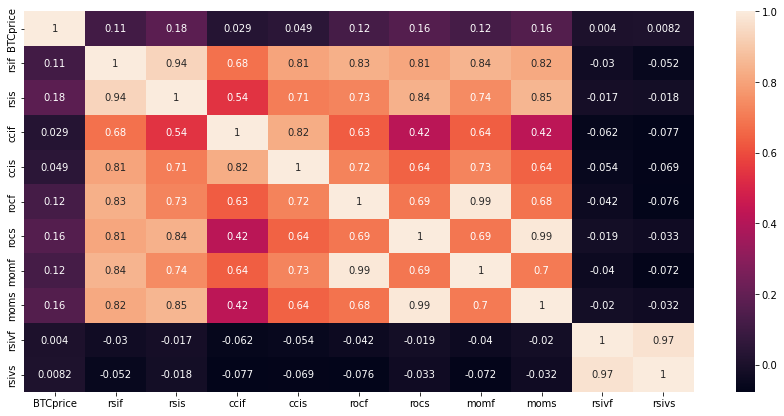

In [237]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[15, 7])

data = {'BTCprice': df['close'],
        'rsif': rsif,
        'rsis': rsis,
        'ccif': ccif,
        'ccis': ccis,
        'rocf': rocf,
        'rocs': rocs,
        'momf': momf,
        'moms': moms,
        'rsivf': rsivf,
        'rsivs': rsivs
        }

df1 = pd.DataFrame(data,columns=['BTCprice','rsif','rsis', 'ccif', 'ccis', 'rocf','rocs','momf','moms','rsivf','rsivs'])

corrMatrix = df1.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()




In [238]:
def normalizer(array):
    minimum = np.nanmin(array)
    maximum = np.nanmax(array)
    for i in range(len(array)):
        array[i] = array[i]/maximum
    return array

In [255]:
#indicators of bitcoin:  10 features total

rsif = talib.RSI(df['close'], timeperiod=14)
rsis = talib.RSI(df['close'], timeperiod=28)

#ccif = talib.CCI(df['high'], df['low'], df['close'], timeperiod=14) ==> eliminated because it's the least correlated
#ccis = talib.CCI(df['high'], df['low'], df['close'], timeperiod=28) ==> eliminated because it's the least correlated

rocf = talib.ROC(df['close'] , 14)
rocs = talib.ROC(df['close'] , 28)

momf = talib.MOM(df['close'] , 14)
moms = talib.MOM(df['close'] , 28)

rsivf = talib.RSI(df['volume'], timeperiod=14)
rsivs = talib.RSI(df['volume'], timeperiod=28)

In [240]:
print(rsif)

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2395    45.729858
2396    53.729621
2397    70.164182
2398    73.557326
2399    74.040655
Length: 2400, dtype: float64


In [241]:
print(rocf)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2395    1.285803
2396    2.272815
2397    5.364265
2398    6.195844
2399    6.115879
Length: 2400, dtype: float64


In [242]:
print(momf)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
2395     380.13
2396     670.99
2397    1581.30
2398    1829.09
2399    1809.39
Length: 2400, dtype: float64


In [243]:
print(rsivf)

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2395    44.828655
2396    48.654057
2397    62.864831
2398    61.010511
2399    49.137398
Length: 2400, dtype: float64


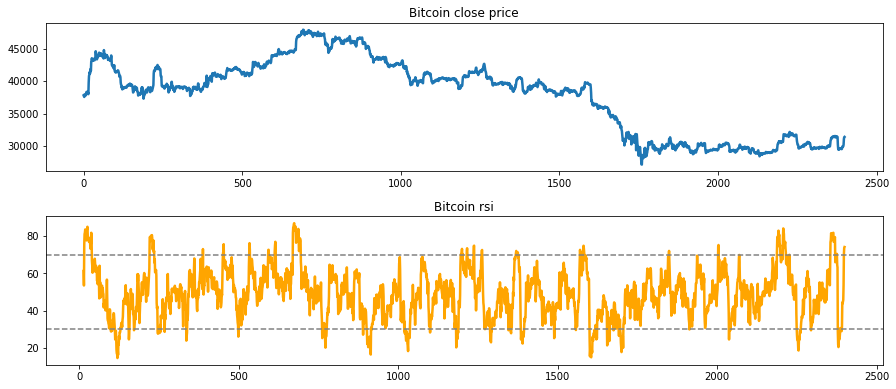

In [244]:
fig = plt.figure(figsize=[15, 7])
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(df['close'], linewidth = 2.5)
ax1.set_title('Bitcoin close price')
ax2.plot( rsif , color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.set_title('Bitcoin rsi')
plt.show()

Text(0.5, 1.0, 'Bitcoin rocf')

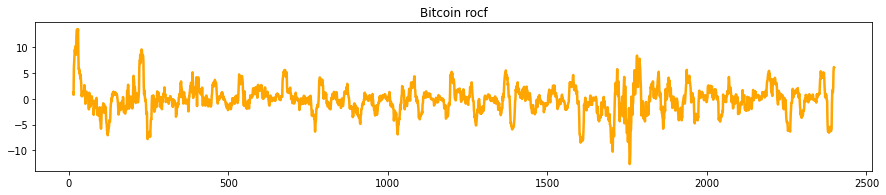

In [245]:
fig = plt.figure(figsize=[15, 7])
ax3 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax3.plot( rocf , color = 'orange', linewidth = 2.5)
ax3.set_title('Bitcoin rocf')

Text(0.5, 1.0, 'Bitcoin momf')

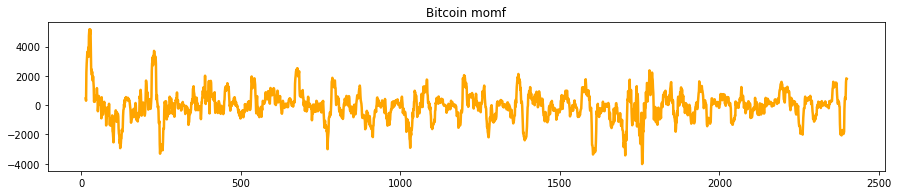

In [246]:
fig = plt.figure(figsize=[15, 7])
ax4 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax4.plot( momf , color = 'orange', linewidth = 2.5)
ax4.set_title('Bitcoin momf')

Text(0.5, 1.0, 'Bitcoin rsivf')

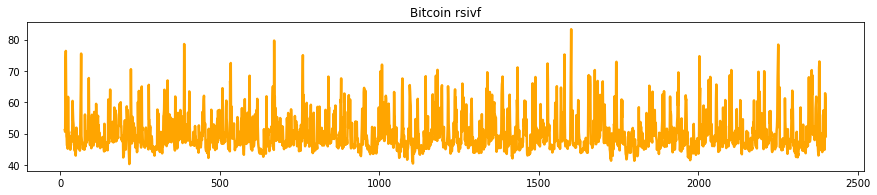

In [247]:
fig = plt.figure(figsize=[15, 7])
ax5 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax5.plot( rsivf , color = 'orange', linewidth = 2.5)
ax5.set_title('Bitcoin rsivf')

In [248]:
#normalize el features el values ywalliw mabin -1 w 1
rsif = normalizer(rsif)
rsis = normalizer(rsis)

rsivf = normalizer(rsivf)
rsivs = normalizer(rsivs)

ccif = normalizer(ccif)
ccis = normalizer(ccis)

momf = normalizer(momf)
moms = normalizer(moms)

rocf = normalizer(rocf)
rocs = normalizer(rocs)

In [249]:
#naabi fil 10 features fi two arrays to visualize, hethi supposedly lel knn ama staamalt neural network


feature1 = []
feature2 = []
for i in range(len(rsif)):
    
    #el feature
    feature1.append((10*rsif[i]  + 0*ccif[i] + 10*rocf[i] + 3*momf[i])/23)
    feature2.append((10*rsis[i]  + 0*ccis[i] + 10*rocs[i] + 3*moms[i] )/23)

positive_candles_x = []
positive_candles_y = []

negative_candles_x = []
negative_candles_y = []


for i in range(100 , len(rsif) -1):
    next_candle = df['close'][i] - df['open'][i]
    
    if(next_candle> 0):
        positive_candles_x.append(feature1[i])
        positive_candles_y.append(feature2[i])
    
    
    if(next_candle < 0):
        negative_candles_x.append(feature1[i])
        negative_candles_y.append(feature2[i])

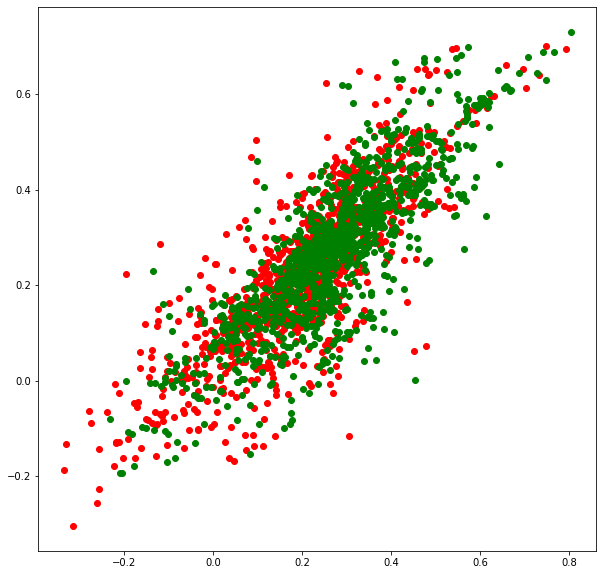

In [250]:
#visualize every hour : ken next hour bitcoin tlaa, 7ot green dot, ken el next hour bitcoin tah, hot red dot selon el 2 features
plt.figure(figsize=(10, 10))
plt.scatter(negative_candles_x,negative_candles_y,color='red')
plt.scatter(positive_candles_x,positive_candles_y,color='green')
#plt.scatter(negative_candles_x,negative_candles_y,color='red')
plt.show()

# Neural Network (supervised learning + classification problem)

In [251]:
#tensorflow neural network code with all 10 features
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense , Dropout
from keras.utils import np_utils
# load the dataset
y = []
X=[]
for i in range(100 , len(rsif)):
    row =[]
    row.append(rsif[i])
    row.append(rsis[i])
    row.append(rocf[i])
    row.append(rocs[i])
    row.append(momf[i])
    row.append(moms[i])
    row.append(ccif[i])
    row.append(ccis[i])
    row.append(rsivf[i])
    row.append(rsivs[i])
    
    X.append(row)
    
    next_candle = df['close'][i] - df['open'][i]
    
    
    #class 1
    #ken next hour tlaa el bitcoin el Y yethat fiha 1,0 which represents class 1 li houwa tlaa
    if(next_candle>= 0):
        y.append([1,0]) 
    
    #class2
    #ken next hour tah el bitcoin el Y yethat fiha 0,1 which represents class 2 li houwa tah
    if(next_candle < 0):
        y.append([0,1])    
        
# data fiha 2390 candle, nkoulou 1900 lel train w el beki lel test    
 
X_train = X[:1900]
X_test = X[1900:]
y_train = y[:1900]
y_test = y[1900:]

#nb_classes = 2
#print(y_train)
#Y_train = np_utils.to_categorical(y_train, nb_classes)
#Y_test = np_utils.to_categorical(y_test, nb_classes)

#print(Y_train[2000])
# split into input (X) and output (y) variables
#X = dataset[:,0:8]
#y = dataset[:,8]
# define the keras model
model = Sequential()
model.add(Dense(512, input_dim=10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=150, batch_size=100)
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
19/19 [==============================] - 1s 8ms/step - loss: 0.6813 - accuracy: 0.5637
Epoch 2/150
19/19 [==============================] - 0s 8ms/step - loss: 0.6441 - accuracy: 0.6221
Epoch 3/150
19/19 [==============================] - 0s 8ms/step - loss: 0.6187 - accuracy: 0.6579
Epoch 4/150
19/19 [==============================] - 0s 8ms/step - loss: 0.5963 - accuracy: 0.6753
Epoch 5/150
19/19 [==============================] - 0s 8ms/step - loss: 0.5879 - accuracy: 0.6784
Epoch 6/150
19/19 [==============================] - 0s 8ms/step - loss: 0.5720 - accuracy: 0.6937
Epoch 7/150
19/19 [==============================] - 0s 8ms/step - loss: 0.5620 - accuracy: 0.7032
Epoch 8/150
19/19 [==============================] - 0s 7ms/step - loss: 0.5530 - accuracy: 0.7074
Epoch 9/150
19/19 [==============================] - 0s 8ms/step - loss: 0.5449 - accuracy: 0.7095
Epoch 10/150
19/19 [==============================] - 0s 8ms/step - loss: 0.5415 - accuracy: 0.7116
Epoch 11/

In [252]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
 
knn.fit(X_train, y_train)
 
# Calculate the accuracy of the model
print(knn.score(X_test, y_test))


0.6725


In [253]:
#nistaamlouha lil aabd illi mayhbch  yitradi kol sea so ma yitradi ken b nesbet 95%
total_number_of_trades = 0 
accuracy_to_trade = 95
for i in range(len(pred)):
    if(pred[i][0] > accuracy_to_trade/100 or pred[i][1] > accuracy_to_trade/100):
        total_number_of_trades+=1
print(str(total_number_of_trades) + " one hour long trades made with an accuracy of "+ str(accuracy_to_trade) + " % , in the past "+ str(len(pred)) + " hours")

139 one hour long trades made with an accuracy of 95 % , in the past 400 hours
